### Jupyter Notebook snippet to visualize how climate change contributed to excess deaths during the late June–early July 2025 European heatwave, using a horizontal split bar chart:

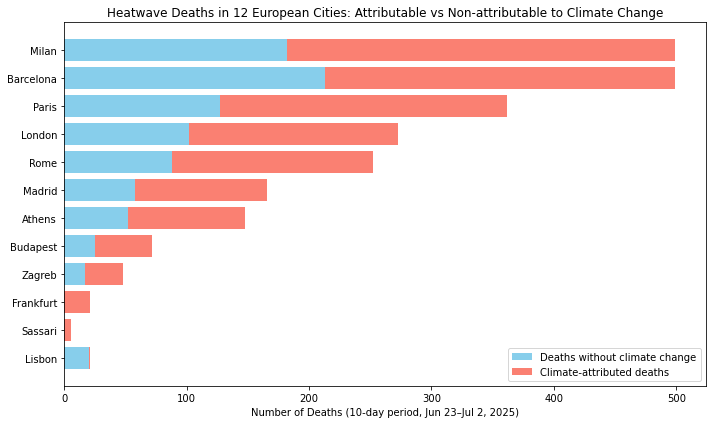

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the World Weather Attribution / Imperial College rapid study:
data = {
    'City': ['Milan', 'Barcelona', 'Paris', 'London', 'Rome', 'Madrid', 
             'Athens', 'Budapest', 'Zagreb', 'Frankfurt', 'Lisbon', 'Sassari'],
    'TotalHeatDeaths': [499, 499, None, 273, None, None, None, None, None, 21, 21, 6],
    'AttributedToClimate': [317, 286, 235, 171, 164, 108, 96, 47, 31, 21, 1, 6]
}
df = pd.DataFrame(data)

# Fill missing total death counts using climate deaths / 0.65 approx
mask = df['TotalHeatDeaths'].isna()
df.loc[mask, 'TotalHeatDeaths'] = (df.loc[mask, 'AttributedToClimate'] / 0.65).round()

# Calculate non-climate deaths
df['NonClimateDeaths'] = df['TotalHeatDeaths'] - df['AttributedToClimate']

# Sort for plotting
df = df.sort_values('AttributedToClimate', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df['City'], df['NonClimateDeaths'], color='skyblue', label='Deaths without climate change')
ax.barh(df['City'], df['AttributedToClimate'], left=df['NonClimateDeaths'], 
        color='salmon', label='Climate‑attributed deaths')
ax.set_xlabel('Number of Deaths (10‑day period, Jun 23–Jul 2, 2025)')
ax.set_title('Heatwave Deaths in 12 European Cities: Attributable vs Non‑attributable to Climate Change')
ax.legend()
plt.tight_layout()
plt.show()


For asian region no data were attributed so I am unable to plot.